<a href="https://colab.research.google.com/github/Kritzr/machine_learning/blob/main/kmeans_kmode_kmedian/kmeans_kmode_kmedian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)


100%|██████████| 3.60k/3.60k [00:00<00:00, 1.18MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/iris/versions/2


In [2]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/uciml/iris/versions/2"
files = os.listdir(dataset_path)

print(files)


['Iris.csv', 'database.sqlite']


In [3]:
import pandas as pd
iris_df = pd.read_csv(os.path.join(dataset_path, 'Iris.csv'))
iris_df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.preprocessing import StandardScaler
X= iris_df.drop(columns=['Species'])
y= iris_df['Species']
#we drop the species colum here since we are doing unsupervised learning and species is the target label for us
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#we create an instance of the standard scalar class, which is used to standardise the data-> that is all the values will be from -1 and 1
import pandas as pd
X_scaleddf = pd.DataFrame(X_scaled, columns=X.columns)
X_scaleddf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977


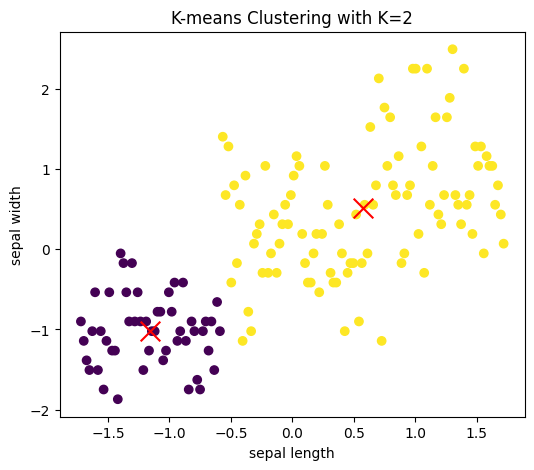

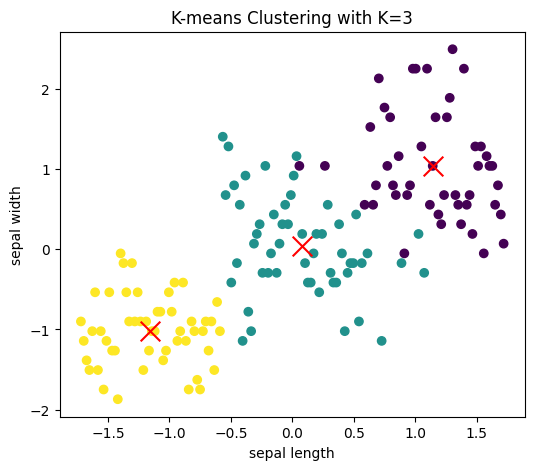

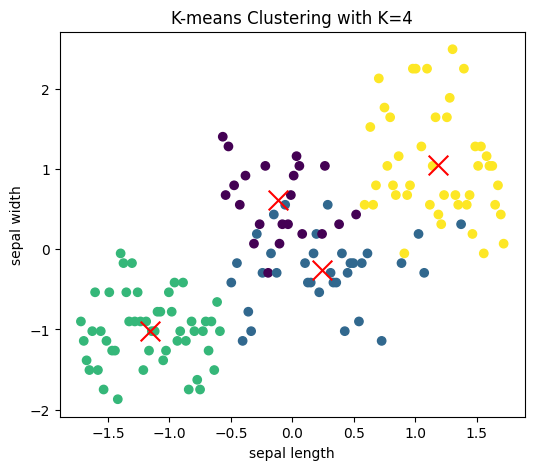

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def apply_kmeans(k, x_scaled):
  kmeans = KMeans(n_clusters=k, random_state =42)
  kmeans.fit(x_scaled)


  plt.figure(figsize =(6,5))
  plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=kmeans.labels_, cmap='viridis')

  centroids = kmeans.cluster_centers_
  plt.scatter(centroids[:,0],centroids[:,1], c='red', s=200, marker='x', label='centroids')
  plt.title(f'K-means Clustering with K={k}')
  plt.xlabel('sepal length')
  plt.ylabel('sepal width')
  plt.show()

  return kmeans.labels_

kmeans_labels_2 = apply_kmeans(2, X_scaled)
kmeans_labels_3 = apply_kmeans(3, X_scaled)
kmeans_labels_4 = apply_kmeans(4, X_scaled)


In [6]:
!pip install kmodes
from kmodes.kmodes import KModes
import numpy as np

def apply_kmodes(k, x_scaled):
  kmodes = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)
  clusters= kmodes.fit_predict(x_scaled)
  return clusters

kmodes_labels_2 = apply_kmodes(2, X_scaled)
kmodes_labels_3 = apply_kmodes(3, X_scaled)
kmodes_labels_4 = apply_kmodes(4, X_scaled)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 16, cost: 640.0
Run 1, iteration: 2/100, moves: 3, cost: 640.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 9, cost: 638.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4, cost: 652.0
Run 3, iteration: 2/100, moves: 1, cost: 652.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 10, cost: 638.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 5, cost: 635.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8, cost: 616.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2, cost:

In [7]:
kmodes =KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)
clusters = kmodes.fit_predict(X_scaled)
print("Cluster Centers:", kmodes.cluster_centroids_)
print("Cluster Labels:", clusters)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9, cost: 646.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 8, cost: 642.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 9, cost: 647.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 7, cost: 654.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1, cost: 650.0
Best run was number 2
Cluster Centers: [[-1.72054204 -1.02184904 -0.1249576  -1.3412724  -1.31297673]
 [-1.65125846  1.03800476  0.10644536  0.53529583  0.39617188]]
Cluster Labels: [0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.1 MB/s eta 0:00:00


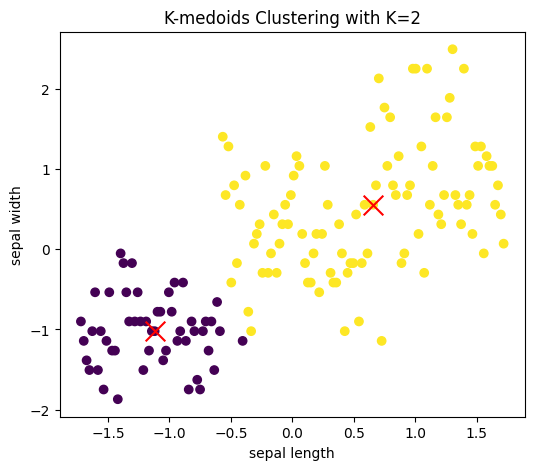

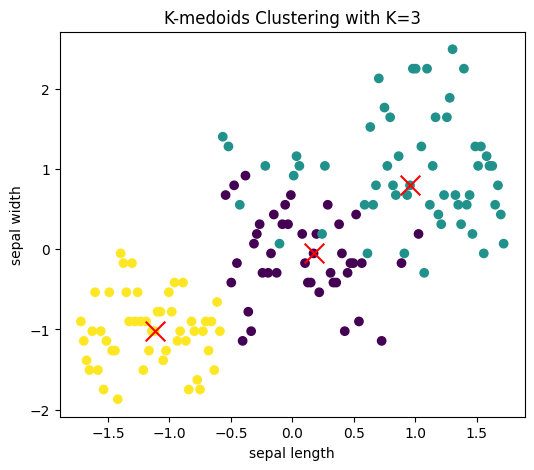

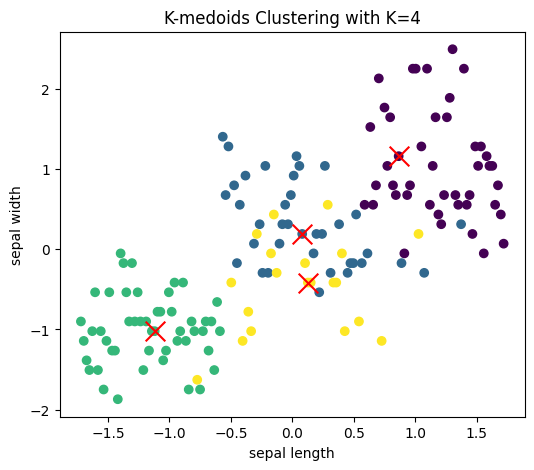

In [10]:
!pip install KMedoids
!pip install scikit-learn-extra

from sklearn_extra.cluster import KMedoids
def apply_kmedoids(k, x_scaled):
  kmedoids = KMedoids(n_clusters=k, random_state=42)
  kmedoids.fit(x_scaled)
  plt.figure(figsize=(6, 5))
  plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=kmedoids.labels_, cmap='viridis')

  medoids = kmedoids.cluster_centers_
  plt.scatter(medoids[:, 0], medoids[:, 1], c='red', s=200, marker='x', label='medoids')
  plt.title(f'K-medoids Clustering with K={k}')
  plt.xlabel('sepal length')
  plt.ylabel('sepal width')
  plt.show()
  return kmedoids.labels_

kmeans_labels_2 = apply_kmedoids(2, X_scaled)
kmeans_labels_3 = apply_kmedoids(3, X_scaled)
kmeans_labels_4 = apply_kmedoids(4, X_scaled)


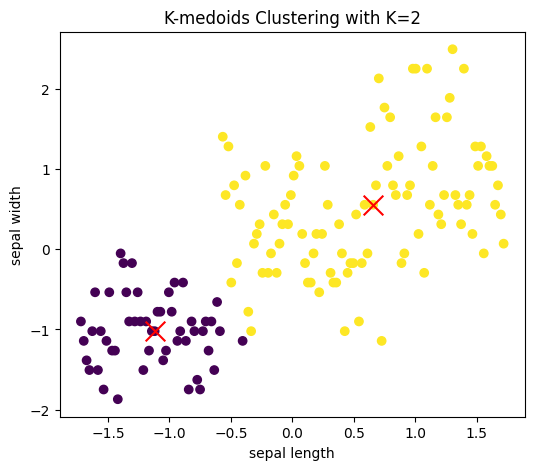

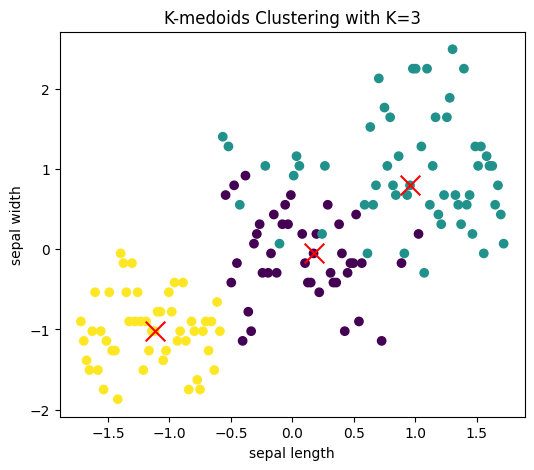

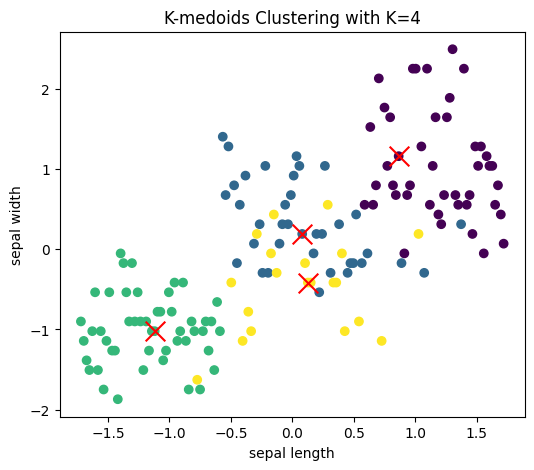

Silhouette Score (K-Means 2 clusters): 0.5662929780250192
Silhouette Score (K-Means 3 clusters): 0.4340943135120247
Silhouette Score (K-Means 4 clusters): 0.4032799722676826
Silhouette Score (K-Median 2 clusters): 0.5662929780250192
Silhouette Score (K-Median 3 clusters): 0.4340943135120247
Silhouette Score (K-Median 4 clusters): 0.4032799722676826
Silhouette Score (K-Mode 2 clusters): -0.028563220366381176
Silhouette Score (K-Mode 3 clusters): -0.0535583972019111
Silhouette Score (K-Mode 4 clusters): -0.08173382536632784


In [12]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for each clustering method
silhouette_kmeans_2 = silhouette_score(X_scaled, kmeans_labels_2)
silhouette_kmeans_3 = silhouette_score(X_scaled, kmeans_labels_3)
silhouette_kmeans_4 = silhouette_score(X_scaled, kmeans_labels_4)

# Assign kmedoids results to kmedians variables
kmedians_labels_2 = apply_kmedoids(2, X_scaled)  # Assign to kmedians_labels_2
kmedians_labels_3 = apply_kmedoids(3, X_scaled)  # Assign to kmedians_labels_3
kmedians_labels_4 = apply_kmedoids(4, X_scaled)  # Assign to kmedians_labels_4


silhouette_kmedians_2 = silhouette_score(X_scaled, kmedians_labels_2)
silhouette_kmedians_3 = silhouette_score(X_scaled, kmedians_labels_3)
silhouette_kmedians_4 = silhouette_score(X_scaled, kmedians_labels_4)

silhouette_kmodes_2 = silhouette_score(X_scaled, kmodes_labels_2)
silhouette_kmodes_3 = silhouette_score(X_scaled, kmodes_labels_3)
silhouette_kmodes_4 = silhouette_score(X_scaled, kmodes_labels_4)

print(f"Silhouette Score (K-Means 2 clusters): {silhouette_kmeans_2}")
print(f"Silhouette Score (K-Means 3 clusters): {silhouette_kmeans_3}")
print(f"Silhouette Score (K-Means 4 clusters): {silhouette_kmeans_4}")

print(f"Silhouette Score (K-Median 2 clusters): {silhouette_kmedians_2}")
print(f"Silhouette Score (K-Median 3 clusters): {silhouette_kmedians_3}")
print(f"Silhouette Score (K-Median 4 clusters): {silhouette_kmedians_4}")

print(f"Silhouette Score (K-Mode 2 clusters): {silhouette_kmodes_2}")
print(f"Silhouette Score (K-Mode 3 clusters): {silhouette_kmodes_3}")
print(f"Silhouette Score (K-Mode 4 clusters): {silhouette_kmodes_4}")